In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

In [3]:
level_progress=pd.read_csv('level_progress.csv',parse_dates=True,index_col='event_datetime')
players=pd.read_csv('players.csv',parse_dates=True,index_col='install_datetime')

In [4]:
level_progress['player_id'].is_monotonic_increasing                                                  # This shows how level_progress is first arranged in asscending order wrt player_id
level_progress.reset_index().groupby('player_id')['event_datetime'].is_monotonic_increasing.all()    # and then by event_datetime within each player_id
# Compared to level_progress, players is just randomly ordered.

True

In [5]:
data=(players.groupby(players['player_id']).count())
data[data['platform']==2]
players.drop(players[players['player_id']=='3D8A1EA896393A2FC953506BE9044428'].index[1],inplace=True)#dropping that one player's data who downloaded the game twice.

In [6]:
MasterDataset=level_progress.reset_index().merge(right=players.reset_index(),on='player_id')
MasterDataset
#Joining the two  datasets

,event_datetime,player_id,level_number,stage_number,status,session_id,install_datetime,platform,country,screen_size,system_memory
0,2022-12-08 00:54:51.813,00030CDB447CCCE184BBF30B3F166EAB,1,1,start,FB4B79C03AF723057EE81F7416061D06,2022-12-08 00:54:37.555,ios,US,9.387676,5618
1,2022-12-08 00:56:52.981,00030CDB447CCCE184BBF30B3F166EAB,1,1,complete,BB5F69316E29360EA35533C8B6EAA6C0,2022-12-08 00:54:37.555,ios,US,9.387676,5618
2,2022-12-08 00:57:07.960,00030CDB447CCCE184BBF30B3F166EAB,1,2,start,BB5F69316E29360EA35533C8B6EAA6C0,2022-12-08 00:54:37.555,ios,US,9.387676,5618
3,2022-12-08 00:58:14.173,00030CDB447CCCE184BBF30B3F166EAB,1,2,complete,72D31206402CD71E19C68A7FB712E128,2022-12-08 00:54:37.555,ios,US,9.387676,5618
4,2022-12-08 00:58:27.386,00030CDB447CCCE184BBF30B3F166EAB,2,1,start,72D31206402CD71E19C68A7FB712E128,2022-12-08 00:54:37.555,ios,US,9.387676,5618
...,...,...,...,...,...,...,...,...,...,...,...
83277,2022-12-28 22:33:08.442,FFF8009A67AF2B8DF2749D9C11C7DC86,4,3,fail,A5DB077CF68CB173444D6AD8FC3E2BF1,2022-12-24 17:30:24.895,android,US,9.794331,3885
83278,2022-12-28 22:33:31.650,FFF8009A67AF2B8DF2749D9C11C7DC86,4,3,complete,A5DB077CF68CB173444D6AD8FC3E2BF1,2022-12-24 17:30:24.895,android,US,9.794331,3885
83279,2022-12-28 22:34:01.408,FFF8009A67AF2B8DF2749D9C11C7DC86,5,1,start,A5DB077CF68CB173444D6AD8FC3E2BF1,2022-12-24 17:30:24.895,android,US,9.794331,3885
83280,2022-12-28 22:34:51.820,FFF8009A67AF2B8DF2749D9C11C7DC86,5,1,complete,A5DB077CF68CB173444D6AD8FC3E2BF1,2022-12-24 17:30:24.895,android,US,9.794331,3885


In [7]:
MasterDataset['Phase']=(MasterDataset['level_number']-1)*3+MasterDataset['stage_number']
MasterDataset.drop(['level_number','stage_number'],axis=1,inplace=True)

In [8]:
MasterDataset['Inter_event_timediff']=MasterDataset.groupby('player_id')['event_datetime'].diff()

In [9]:
# Verifying that each event has been mapped with the correct event time diference
MasterDataset.groupby('player_id')['Inter_event_timediff'].aggregate(lambda x:x.iloc[0]).isnull().all()
# True, means first entry of every player is null, cause there's no event to calculate the difference from when at the first event

True

In [10]:
MasterDataset['player_id'].unique().shape,MasterDataset['Inter_event_timediff'].isnull().sum()# Also there are as many players as there are nulls in 'Inter_event_timediff'

((4939,), 4939)

In [11]:
MasterDataset.to_csv('MasterDataset.csv')
MasterDataset

,event_datetime,player_id,status,session_id,install_datetime,platform,country,screen_size,system_memory,Phase,Inter_event_timediff
0,2022-12-08 00:54:51.813,00030CDB447CCCE184BBF30B3F166EAB,start,FB4B79C03AF723057EE81F7416061D06,2022-12-08 00:54:37.555,ios,US,9.387676,5618,1,NaT
1,2022-12-08 00:56:52.981,00030CDB447CCCE184BBF30B3F166EAB,complete,BB5F69316E29360EA35533C8B6EAA6C0,2022-12-08 00:54:37.555,ios,US,9.387676,5618,1,0 days 00:02:01.168000
2,2022-12-08 00:57:07.960,00030CDB447CCCE184BBF30B3F166EAB,start,BB5F69316E29360EA35533C8B6EAA6C0,2022-12-08 00:54:37.555,ios,US,9.387676,5618,2,0 days 00:00:14.979000
3,2022-12-08 00:58:14.173,00030CDB447CCCE184BBF30B3F166EAB,complete,72D31206402CD71E19C68A7FB712E128,2022-12-08 00:54:37.555,ios,US,9.387676,5618,2,0 days 00:01:06.213000
4,2022-12-08 00:58:27.386,00030CDB447CCCE184BBF30B3F166EAB,start,72D31206402CD71E19C68A7FB712E128,2022-12-08 00:54:37.555,ios,US,9.387676,5618,4,0 days 00:00:13.213000
...,...,...,...,...,...,...,...,...,...,...,...
83277,2022-12-28 22:33:08.442,FFF8009A67AF2B8DF2749D9C11C7DC86,fail,A5DB077CF68CB173444D6AD8FC3E2BF1,2022-12-24 17:30:24.895,android,US,9.794331,3885,12,0 days 00:00:21.498000
83278,2022-12-28 22:33:31.650,FFF8009A67AF2B8DF2749D9C11C7DC86,complete,A5DB077CF68CB173444D6AD8FC3E2BF1,2022-12-24 17:30:24.895,android,US,9.794331,3885,12,0 days 00:00:23.208000
83279,2022-12-28 22:34:01.408,FFF8009A67AF2B8DF2749D9C11C7DC86,start,A5DB077CF68CB173444D6AD8FC3E2BF1,2022-12-24 17:30:24.895,android,US,9.794331,3885,13,0 days 00:00:29.758000
83280,2022-12-28 22:34:51.820,FFF8009A67AF2B8DF2749D9C11C7DC86,complete,A5DB077CF68CB173444D6AD8FC3E2BF1,2022-12-24 17:30:24.895,android,US,9.794331,3885,13,0 days 00:00:50.412000


# Studying non monotonic phase progression

In [12]:
MasterDataset['player_id'].is_monotonic_increasing
MasterDataset.groupby('player_id')['event_datetime'].is_monotonic_increasing.all()

True

In [13]:
MasterDataset.set_index(['player_id','event_datetime'],inplace=True) # setting the player_id and event_datetime as indeces
MasterDataset

status  \
player_id                        event_datetime                      
00030CDB447CCCE184BBF30B3F166EAB 2022-12-08 00:54:51.813     start   
                                 2022-12-08 00:56:52.981  complete   
                                 2022-12-08 00:57:07.960     start   
                                 2022-12-08 00:58:14.173  complete   
                                 2022-12-08 00:58:27.386     start   
...                                                            ...   
FFF8009A67AF2B8DF2749D9C11C7DC86 2022-12-28 22:33:08.442      fail   
                                 2022-12-28 22:33:31.650  complete   
                                 2022-12-28 22:34:01.408     start   
                                 2022-12-28 22:34:51.820  complete   
                                 2022-12-28 22:35:10.511     start   

                                                                                session_id  \
player_id                        event_datetime                                              
00030CDB447CCCE184BBF30B3F166EAB 2022-12-08 00:54:51.813  FB4B79C03AF723057EE81F7416061D06   
                                 2022-12-08 00:56:52.981  BB5F69316E29360EA35533C8B6EAA6C0   
                                 2022-12-08 00:57:07.960  BB5F69316E29360EA35533C8B6EAA6C0   
                                 2022-12-08 00:58:14.173  72D31206402CD71E19C68A7FB712E128   
                                 2022-12-08 00:58:27.386  72D31206402CD71E19C68A7FB712E128   
...                                                                                    ...   
FFF8009A67AF2B8DF2749D9C11C7DC86 2022-12-28 22:33:08.442  A5DB077CF68CB173444D6AD8FC3E2BF1   
                                 2022-12-28 22:33:31.650  A5DB077CF68CB173444D6AD8FC3E2BF1   
                                 2022-12-28 22:34:01.408  A5DB077CF68CB173444D6AD8FC3E2BF1   
                                 2022-12-28 22:34:51.820  A5DB077CF68CB173444D6AD8FC3E2BF1   
                                 2022-12-28 22:35:10.511  A5DB077CF68CB173444D6AD8FC3E2BF1   

                                                                install_datetime  \
player_id                        event_datetime                                    
00030CDB447CCCE184BBF30B3F166EAB 2022-12-08 00:54:51.813 2022-12-08 00:54:37.555   
                                 2022-12-08 00:56:52.981 2022-12-08 00:54:37.555   
                                 2022-12-08 00:57:07.960 2022-12-08 00:54:37.555   
                                 2022-12-08 00:58:14.173 2022-12-08 00:54:37.555   
                                 2022-12-08 00:58:27.386 2022-12-08 00:54:37.555   
...                                                                          ...   
FFF8009A67AF2B8DF2749D9C11C7DC86 2022-12-28 22:33:08.442 2022-12-24 17:30:24.895   
                                 2022-12-28 22:33:31.650 2022-12-24 17:30:24.895   
                                 2022-12-28 22:34:01.408 2022-12-24 17:30:24.895   
                                 2022-12-28 22:34:51.820 2022-12-24 17:30:24.895   
                                 2022-12-28 22:35:10.511 2022-12-24 17:30:24.895   

                                                         platform country  \
player_id                        event_datetime                             
00030CDB447CCCE184BBF30B3F166EAB 2022-12-08 00:54:51.813      ios      US   
                                 2022-12-08 00:56:52.981      ios      US   
                                 2022-12-08 00:57:07.960      ios      US   
                                 2022-12-08 00:58:14.173      ios      US   
                                 2022-12-08 00:58:27.386      ios      US   
...                                                           ...     ...   
FFF8009A67AF2B8DF2749D9C11C7DC86 2022-12-28 22:33:08.442  android      US   
                                 2022-12-28 22:33:31.650  android      US   
                                 2022-12-28 22:34:01.408  andro

In [14]:
Users_NonMonotonicPhaseProgression=MasterDataset.index.get_level_values(0).unique()[MasterDataset.groupby(level=0)['Phase'].is_monotonic_increasing==False]
Users_NonMonotonicPhaseProgression # Contains user's whose progress in the game wer3 non monotonic

Index(['1064F06F775265825C83302C4AB66059', '121684A377CB52E2177CBF0951752897',
       '25CAEC5A3CF752D1F81B851908F15C58', '27B630E8813F47590725DD515206B460',
       '2FEACFD391FC4DEBA7D695904EE7FC4F', '3013D7306968DDE2A57BC22E4CFC4974',
       '358FFB3590EE4125FAAD74324D07CFE7', '36C39475A807A0F7F13646702FE04C9D',
       '3D8A1EA896393A2FC953506BE9044428', '42E3CC95F5852ABFC42649BD1161B756',
       '559E7DD98A5FA74012C6DF4630DC98F3', '67026F0671C20A2C59ED9982E84C259F',
       '78F165D9E6C7D1DFBA623CA29A6DA7AB', '7DA70529E4955DEB6A77116E0B1D1811',
       '8DFB61D89039367E005D4D1847A549A4', 'A191801453B866CDC15D616DB68CE012',
       'B0064049E9A31AF14066304575A4ACC2', 'B2ACDC1AE18C085DC368751DBA4D6437',
       'B487A708D4013261955465B0177CEC6D', 'C09DA127B5443A70DEC0CF7DD880F862',
       'D32AEDF45E6B46BE95233C2C95CEC210', 'D9EFAD544B15A10F85506304508528D1',
       'E6D737854A218AA73799E58C6403DFC6', 'ED04B6662191D944CEDC1DFA602A42D1',
       'F3F21FEC35EF08C083D97ADE9ABB45F5', 'F56BBE56

In [15]:
NonMonotonicPhaseProgression=MasterDataset[MasterDataset.index.get_level_values(0).isin(Users_NonMonotonicPhaseProgression)]
NonMonotonicPhaseProgression

status  \
player_id                        event_datetime                      
1064F06F775265825C83302C4AB66059 2022-12-11 22:09:00.594     start   
                                 2022-12-11 22:10:56.428  complete   
                                 2022-12-25 13:24:02.394     start   
                                 2022-12-25 13:25:22.918  complete   
                                 2022-12-25 13:25:33.104     start   
...                                                            ...   
F56BBE567C612BEC88FA0C6E28F26405 2022-12-22 02:25:03.838     start   
                                 2022-12-22 02:26:23.804  complete   
                                 2022-12-22 02:26:34.516     start   
                                 2022-12-22 02:30:18.717      fail   
                                 2022-12-22 02:31:14.289     start   

                                                                                session_id  \
player_id                        event_datetime                                              
1064F06F775265825C83302C4AB66059 2022-12-11 22:09:00.594  58BAB3373F38E8FC171A7ED97CE0C47B   
                                 2022-12-11 22:10:56.428  CE551FC5BD91D271FE634A5520665A47   
                                 2022-12-25 13:24:02.394  AFEB217F7DE41FCB8C735F6CE5C67BC5   
                                 2022-12-25 13:25:22.918  34EDA13A37D1F2BD51A26509A971783D   
                                 2022-12-25 13:25:33.104  34EDA13A37D1F2BD51A26509A971783D   
...                                                                                    ...   
F56BBE567C612BEC88FA0C6E28F26405 2022-12-22 02:25:03.838  858303FAC2E115C00894432457B0356D   
                                 2022-12-22 02:26:23.804  2601C0302348A43C655055FED8E4DE27   
                                 2022-12-22 02:26:34.516  2601C0302348A43C655055FED8E4DE27   
                                 2022-12-22 02:30:18.717  114FB188CBD58976BE11A67D7F22B404   
                                 2022-12-22 02:31:14.289  F7FD32039740FE4E2D2FF1BA8A1DFE5B   

                                                                install_datetime  \
player_id                        event_datetime                                    
1064F06F775265825C83302C4AB66059 2022-12-11 22:09:00.594 2022-12-31 01:36:36.000   
                                 2022-12-11 22:10:56.428 2022-12-31 01:36:36.000   
                                 2022-12-25 13:24:02.394 2022-12-31 01:36:36.000   
                                 2022-12-25 13:25:22.918 2022-12-31 01:36:36.000   
                                 2022-12-25 13:25:33.104 2022-12-31 01:36:36.000   
...                                                                          ...   
F56BBE567C612BEC88FA0C6E28F26405 2022-12-22 02:25:03.838 2022-12-18 02:53:29.052   
                                 2022-12-22 02:26:23.804 2022-12-18 02:53:29.052   
                                 2022-12-22 02:26:34.516 2022-12-18 02:53:29.052   
                                 2022-12-22 02:30:18.717 2022-12-18 02:53:29.052   
                                 2022-12-22 02:31:14.289 2022-12-18 02:53:29.052   

                                                         platform country  \
player_id                        event_datetime                             
1064F06F775265825C83302C4AB66059 2022-12-11 22:09:00.594      ios      US   
                                 2022-12-11 22:10:56.428      ios      US   
                                 2022-12-25 13:24:02.394      ios      US   
                                 2022-12-25 13:25:22.918      ios      US   
                                 2022-12-25 13:25:33.104      ios      US   
...                                                           ...     ...   
F56BBE567C612BEC88FA0C6E28F26405 2022-12-22 02:25:03.838      ios      US   
                                 2022-12-22 02:26:23.804      ios      US   
                                 2022-12-22 02:26:34.516      i

In [16]:
idx=pd.IndexSlice
NonMonotonicPhaseProgression.loc[idx[Users_NonMonotonicPhaseProgression[22]],'Phase'].values

array([ 1,  1,  2,  2,  2,  4,  4,  5,  5,  5,  6,  6,  6,  6,  6,  6,  7,
        7,  8,  8,  9,  9, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 13, 13,
       13, 11, 11, 12, 12, 13, 13, 13], dtype=int64)

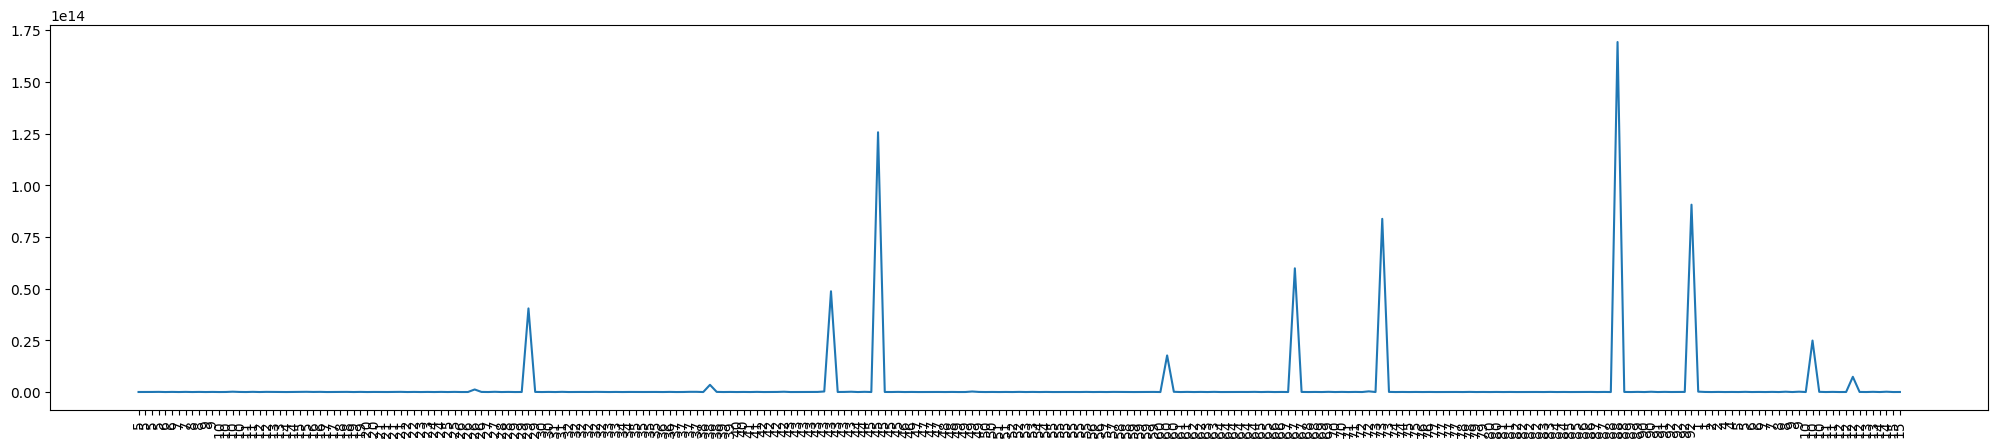

In [17]:
OneUser=NonMonotonicPhaseProgression.loc[idx[Users_NonMonotonicPhaseProgression[4],:],:]
# OneUser[['Inter_event_timediff','Phase']].reset_index(drop=True)
ValuesToPlot=OneUser[['Inter_event_timediff','Phase']][6:].reset_index(drop=True)
plt.figure(figsize=(25,5))
plt.plot(ValuesToPlot.index,ValuesToPlot['Inter_event_timediff']);
plt.xticks(ValuesToPlot.index,ValuesToPlot['Phase'],rotation=90);


# Inter_event_timediff frequency study

In [18]:
InterEventTimeDifferences=MasterDataset.reset_index(drop=True)['Inter_event_timediff'].dt.total_seconds()
MasterDataset.reset_index(drop=True).loc[InterEventTimeDifferences.idxmin()-2:InterEventTimeDifferences.idxmin()+2,:]
# This is suspicious. Phase 8 is being `completed` and right 0.126 seconds after that the next phase is being completed without even a `start` event.

,status,session_id,install_datetime,platform,country,screen_size,system_memory,Phase,Inter_event_timediff
43040,start,198B5982D1EF60E61DE8C92AC4CE1766,2022-12-26 03:18:34.340,ios,US,8.555986,5695,8,0 days 00:00:09.909000
43041,complete,3BA2BE3E610508583619880A6D34EAA2,2022-12-26 03:18:34.340,ios,US,8.555986,5695,8,0 days 00:02:29.504000
43042,complete,67797DB1CCAE375E17CD5D3D62343B38,2022-12-26 03:18:34.340,ios,US,8.555986,5695,9,0 days 00:00:00.126000
43043,start,67797DB1CCAE375E17CD5D3D62343B38,2022-12-26 03:18:34.340,ios,US,8.555986,5695,10,0 days 00:00:17.687000
43044,fail,67797DB1CCAE375E17CD5D3D62343B38,2022-12-26 03:18:34.340,ios,US,8.555986,5695,10,0 days 00:00:40.313000


In [19]:
# pd.set_option('display.float_format', '{:.4f}'.format)
print(InterEventTimeDifferences.describe())

count    7.834300e+04
mean     1.135180e+04
std      8.158611e+04
min      1.260000e-01
25%      1.479550e+01
50%      4.372400e+01
75%      8.250150e+01
max      2.410520e+06
Name: Inter_event_timediff, dtype: float64


In [32]:
InterEventTimeDifferences.dropna().sort_values(inplace=True)

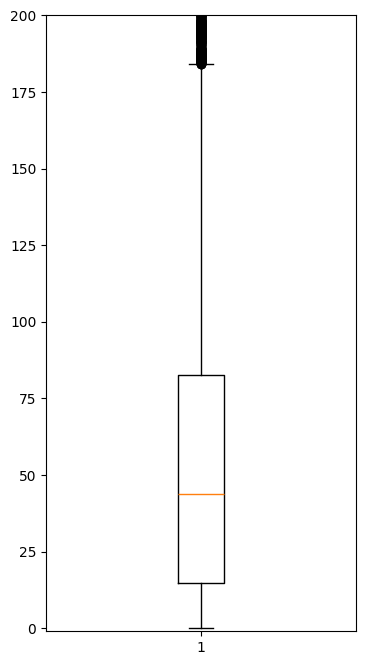

In [104]:
plt.figure(figsize=(4,8))
plt.ylim(-1,200)
plot=plt.boxplot(InterEventTimeDifferences)

(array([2.000e+00, 0.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.600e+01, 3.700e+01, 3.000e+00, 4.000e+00, 2.200e+01,
        2.000e+01, 1.300e+01, 6.000e+00, 3.000e+00, 4.000e+00, 7.000e+00,
        9.000e+00, 1.500e+01, 1.600e+01, 3.100e+01, 9.000e+01, 1.770e+02,
        2.883e+03, 3.250e+03, 2.207e+03, 1.642e+03, 1.261e+03, 1.084e+03,
        1.220e+03, 1.378e+03, 1.100e+03, 8.900e+02, 8.220e+02, 7.160e+02,
        6.610e+02, 5.390e+02, 4.720e+02, 5.080e+02, 4.200e+02, 4.130e+02,
        3.790e+02, 3.360e+02, 3.380e+02, 3.290e+02, 2.790e+02, 2.990e+02,
        2.720e+02, 2.700e+02, 2.520e+02, 2.650e+02, 2.430e+02, 2.330e+02,
        2.360e+02, 2.270e+02, 2.240e+02, 2.120e+02, 1.990e+02, 2.090e+02,
        2.140e+02, 1.850e+02, 2.190e+02, 2.300e+02, 2.200e+02, 2.190e+02,
        2.310e+02, 2.150e+02, 2.360e+02, 2.060e+02, 2.050e+02, 2.640e+02,
        2.760e+02, 2.480e+02, 2.850e+02, 2.950e+02, 2.740e+02, 2.800e+02,
        3.060e+02, 3.140e+02, 3.130e+0

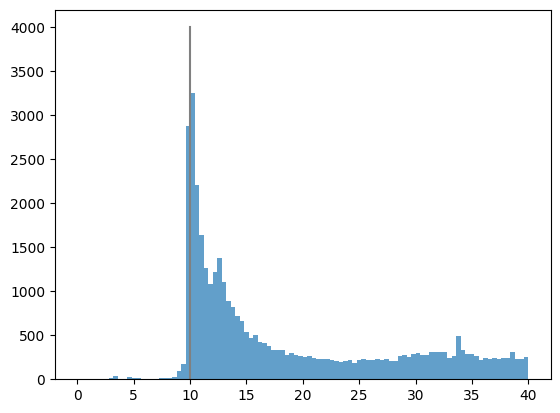

In [128]:
plt.plot([10,10],[0,4000],color='grey')
plt.hist(InterEventTimeDifferences,range=(0,40),bins=100,alpha=.7)


In [117]:
Quantiles=InterEventTimeDifferences.quantile([.25,.75]) # To estimate the middle of the plot.
IQR=Quantiles[.75]-Quantiles[.25] # Inter-Quartile Range: Calculating the difference between the 1/4th and 3/4th quartile.
(InterEventTimeDifferences<(Quantiles[.75]+1.5*IQR)).sum()

0.8915027507243787

In [ ]:
plt.boxplot('')